# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

#weather_api_key = "fffb9384b53ddddafa48bf6bfe146a5b"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "https://api.openweathermap.org/data/2.5/weather?q=" 
units = "imperial"

citydata = []

i = 0

for city in cities:
    #print(city)
    i = i + 1
    url = base_url + city + "&appid=" + weather_api_key + "&units=" + units
    try:
        response = requests.get(url).json()
        temperature= response["main"]["temp"]
        latitude = response["coord"]["lat"]
        longitude = response["coord"]["lon"]
        humidity = response["main"]["humidity"]
        wind_speed = response["wind"]["speed"]
        cloudiness = response["clouds"]["all"]
        country = response["sys"]["country"]
        date = response["dt"]
        citydata.append({"City": city,
                         "Country": country,
                         "Date": date,
                        "Temperature": temperature,
                        "Latitude": latitude,
                        "Longitude": longitude,
                        "Humidity": humidity,
                        "Wind Speed": wind_speed,
                        "Cloudiness": cloudiness,})
        
        print(f'Record no.{i}|{city}')
        
        time.sleep(0.2)
    
    #If no record found then pass to the next city
    except:
        print(f'City not found')
        pass

Record no.1|la ronge
Record no.2|saint-philippe
Record no.3|plouzane
Record no.4|porto santo
Record no.5|zhigansk
Record no.6|saint-pierre
Record no.7|frutal
Record no.8|huayang
Record no.9|busselton
Record no.10|albany
Record no.11|olafsvik
Record no.12|jurm
Record no.13|horta
Record no.14|punta arenas
Record no.15|olutanga
Record no.16|wencheng
Record no.17|grindavik
Record no.18|rikitea
Record no.19|kavaratti
Record no.20|ryotsu
Record no.21|luderitz
Record no.22|ushuaia
Record no.23|tromso
Record no.24|tezu
Record no.25|cidreira
Record no.26|port alfred
Record no.27|nanortalik
Record no.28|kotido
Record no.29|krasnoselkup
Record no.30|richards bay
Record no.31|maromitsa
Record no.32|mayma
Record no.33|broome
Record no.34|mataura
Record no.35|georgetown
Record no.36|new norfolk
Record no.37|asyut
Record no.38|port blair
Record no.39|gandorhun
City not found
Record no.41|vao
Record no.42|rocha
Record no.43|mandalgovi
Record no.44|touros
Record no.45|arkhangelsk
Record no.46|carnarvon

Record no.364|kiama
Record no.365|atbasar
Record no.366|fortuna
City not found
City not found
Record no.369|pila
Record no.370|urcos
City not found
Record no.372|dwarka
City not found
Record no.374|komsomolskiy
Record no.375|shubarkuduk
Record no.376|tura
Record no.377|quang ngai
Record no.378|halifax
Record no.379|adrar
Record no.380|daru
Record no.381|hay river
Record no.382|victor harbor
Record no.383|klaksvik
Record no.384|malanje
City not found
Record no.386|nuevo progreso
Record no.387|yumen
Record no.388|rassvet
Record no.389|truth or consequences
Record no.390|nishihara
Record no.391|erenhot
Record no.392|eufaula
Record no.393|gulf gate estates
City not found
Record no.395|katsuura
Record no.396|dongsheng
Record no.397|oistins
Record no.398|dzhebariki-khaya
City not found
Record no.400|leh
Record no.401|hansot
Record no.402|ballina
City not found
Record no.404|hofu
Record no.405|wuda
Record no.406|bahir dar
Record no.407|pimenteiras
Record no.408|rundu
Record no.409|ust-ilimsk


In [21]:
print(citydata)

[{'City': 'la ronge', 'Country': 'CA', 'Date': 1586552041, 'Temperature': 28.4, 'Latitude': 55.1, 'Longitude': -105.28, 'Humidity': 63, 'Wind Speed': 17.22, 'Cloudiness': 90}, {'City': 'saint-philippe', 'Country': 'RE', 'Date': 1586551639, 'Temperature': 69.85, 'Latitude': -21.36, 'Longitude': 55.77, 'Humidity': 78, 'Wind Speed': 10.29, 'Cloudiness': 20}, {'City': 'plouzane', 'Country': 'FR', 'Date': 1586552042, 'Temperature': 59.05, 'Latitude': 48.38, 'Longitude': -4.62, 'Humidity': 67, 'Wind Speed': 3.36, 'Cloudiness': 0}, {'City': 'porto santo', 'Country': 'PT', 'Date': 1586551770, 'Temperature': 64.92, 'Latitude': 33.07, 'Longitude': -16.34, 'Humidity': 77, 'Wind Speed': 9.17, 'Cloudiness': 20}, {'City': 'zhigansk', 'Country': 'RU', 'Date': 1586552043, 'Temperature': 19.54, 'Latitude': 66.77, 'Longitude': 123.37, 'Humidity': 94, 'Wind Speed': 11.48, 'Cloudiness': 0}, {'City': 'saint-pierre', 'Country': 'RE', 'Date': 1586551658, 'Temperature': 70.66, 'Latitude': -21.34, 'Longitude':

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
citydata_df = pd.DataFrame(citydata)
citydata_df

City Country        Date  Temperature  Latitude  Longitude  \
0          la ronge      CA  1586552041        28.40     55.10    -105.28   
1    saint-philippe      RE  1586551639        69.85    -21.36      55.77   
2          plouzane      FR  1586552042        59.05     48.38      -4.62   
3       porto santo      PT  1586551770        64.92     33.07     -16.34   
4          zhigansk      RU  1586552043        19.54     66.77     123.37   
..              ...     ...         ...          ...       ...        ...   
577     walla walla      US  1586552343        69.28     46.06    -118.34   
578         margate      GB  1586552344        52.79     51.38       1.39   
579          beihai      CN  1586552344        73.33     21.48     109.10   
580          cortez      US  1586551772        59.79     37.35    -108.59   
581          tungor      RU  1586551854        19.83     53.38     142.96   

     Humidity  Wind Speed  Cloudiness  
0          63       17.22          90  
1          78       10.29          20  
2          67        3.36           0  
3          77        9.17          20  
4          94       11.48           0  
..        ...         ...         ...  
577        32        9.17           1  
578        87        3.36          53  
579        90       12.03          98  
580        16       12.75           1  
581        96        4.29           0  

[582 rows x 9 columns]

In [6]:
citydata_df.to_csv("city_new_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

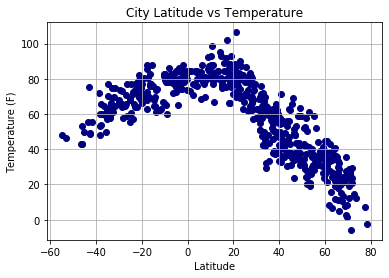

In [7]:
plt.scatter(citydata_df["Latitude"], citydata_df["Temperature"], marker = "o", facecolors='navy', edgecolors = 'navy')

plt.title("City Latitude vs Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

In [8]:
#Save the figure
plt.savefig("Latitude_vs_Temperature.png", dpi= 150)
plt.show()

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Humidity Plot

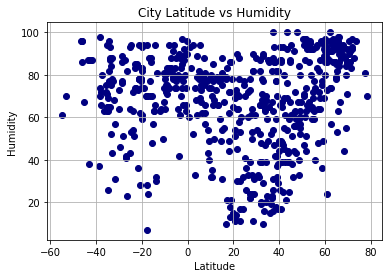

In [9]:
plt.scatter(citydata_df["Latitude"], citydata_df["Humidity"], marker = "o", facecolors='navy', edgecolors = 'navy')

plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_vs_Humidity.png", dpi= 150)
plt.show()

#### Latitude vs. Cloudiness Plot

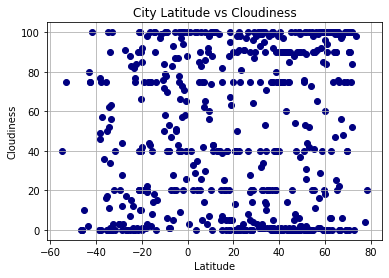

In [10]:
plt.scatter(citydata_df["Latitude"], citydata_df["Cloudiness"], marker = "o", facecolors='navy', edgecolors = 'navy')

plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_vs_Cloudiness.png", dpi= 150)
plt.show()

#### Latitude vs. Wind Speed Plot

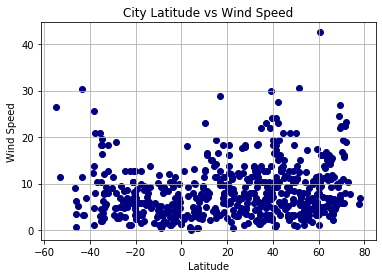

In [11]:
plt.scatter(citydata_df["Latitude"], citydata_df["Wind Speed"], marker = "o", facecolors='navy', edgecolors = 'navy')

plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_vs_WindSpeed.png", dpi= 150)
plt.show()

## Linear Regression

In [12]:
# Create Northern and Southern Hemisphere DataFrames
north_hemisphere = citydata_df.loc[citydata_df["Latitude"]>=0]
south_hemisphere = citydata_df.loc[citydata_df["Latitude"]<0]

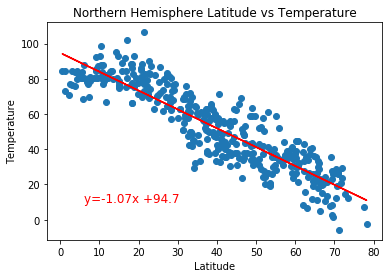

In [13]:
x_values = north_hemisphere["Latitude"]
y_values = north_hemisphere["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10), fontsize = 12, color ='red')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Northern Hemisphere Latitude vs Temperature')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

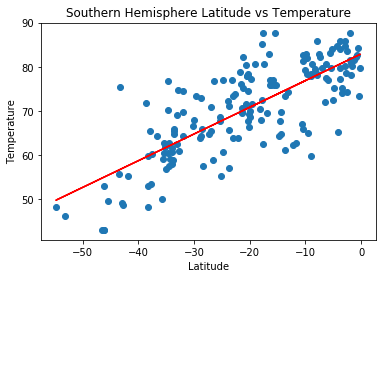

In [14]:
x_values = south_hemisphere["Latitude"]
y_values = south_hemisphere["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-17,10), fontsize = 12, color ='red')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Southern Hemisphere Latitude vs Temperature')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

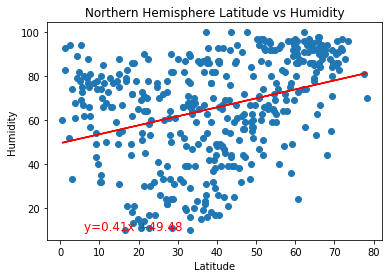

In [15]:
x_values = north_hemisphere["Latitude"]
y_values = north_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10), fontsize = 12, color ='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere Latitude vs Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

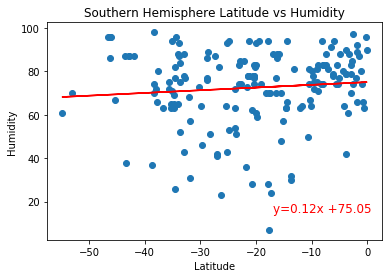

In [16]:
x_values = south_hemisphere["Latitude"]
y_values = south_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-17,15), fontsize = 12, color ='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere Latitude vs Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

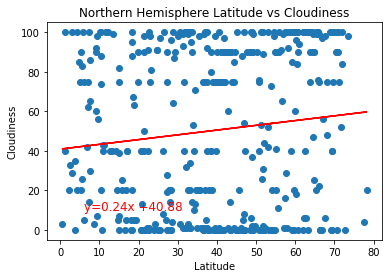

In [17]:
x_values = north_hemisphere["Latitude"]
y_values = north_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10), fontsize = 12, color ='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere Latitude vs Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

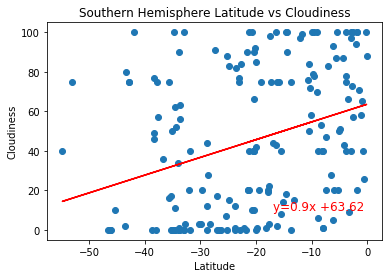

In [18]:
x_values = south_hemisphere["Latitude"]
y_values = south_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-17,10), fontsize = 12, color ='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere Latitude vs Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

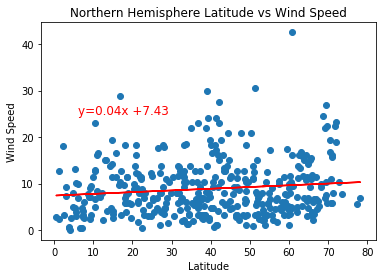

In [19]:
x_values = north_hemisphere["Latitude"]
y_values = north_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,25), fontsize = 12, color ='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere Latitude vs Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

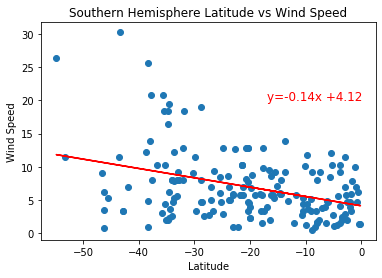

In [20]:
x_values = south_hemisphere["Latitude"]
y_values = south_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-17,20), fontsize = 12, color ='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere Latitude vs Wind Speed')
plt.show()